In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
# fix the seed for reproducibility
random.seed(42)

# Linear Regression

## Problem Formulation

In linear regression, the goal is to minimise the error between the given data points and the best fit line. The error is given by the vertical distance between the actual point and the regression line \\

More formally, let us define our given data points as $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$. For each $x_i$, we will predict a value called $y_{i, pred}$. Then, the error, $ɛ_i$, at each point is defined as $$ ɛ_i = y_{i, pred} - y_i $$

Now, we'd like to sum up all the errors and minimise the sum. However, we can't just add up the errors directly as the +ve and -ve errors will cancel each other out, thus under-representing the true error. \\

Instead, we will add the squared error. We shall define the mean of the squared errors to be the **Loss Function**, $L$, i.e.
$$ L = \frac{1}{2n} \sum_{i=1}^n ɛ_i^2 = \frac{1}{2n} \sum_{i=1}^n (y_{i, pred} - y_i)^2 \ \ \ (*) $$

Now, notice that in the 2-dimensional case, our best fit line is just $y = mx + c$, where $m, c$ are values that we have to figure out ($m$ and $c$ are randomly initialised). That means, for each $x_i$, we have $y_{i, pred} = mx_i + c$. That allows us to re-write the expression (*) as
$$ L(m, c) = \frac{1}{2n} \sum_{i=1}^n (mx_i + c - y_i)^2 $$

Note that from this substitution, we can explicitly write $L$ as a function of $m$ and $c$. This is important, as this implies that to minimise the value of the Loss Function, we just need to find optimal values for $m$ and $c$.

## Gradient Descent Computation (Optional)

It is well-known that the gradient vector, $\nabla L(m ,c)$ gives the direction of steepest ascent for each point $m$ and $c$. Intuitively, what that means that the direction that the gradient vector, $\nabla L(m, c)$, points in is the direction that results in the greatest increase to the value of $L(m, c)$. \\

In the language of partial derivatives, we have
$$
\nabla L(m, c) = \begin{bmatrix}
                \frac{\partial L}{\partial m} \\
                \frac{\partial L}{\partial c}
                \end{bmatrix}
$$
<br>
Computing the partial derivatives with respect to $m$, for $\frac{\partial L}{\partial m}$ gives us
$$ \frac{\partial L}{\partial m} = \frac{1}{n}\sum_{i=1}^n x_i(mx_i + c - y_i) $$

Similarly, for $\frac{\partial L}{\partial c}$, we have
$$ \frac{\partial L}{\partial c} = \frac{1}{n}\sum_{i=1}^n (mx_i + c - y_i) $$

Then, at each iteration, we can update the values of $m$ and $c$ in the following manner

$$
\begin{bmatrix}
    m_{new} \\
    c_{new}
\end{bmatrix}
=
\begin{bmatrix}
    m_{old} \\
    c_{old}
\end{bmatrix} -k \nabla L(m_{old}, c_{old})
$$
<br>
where $k$ is the learning rate, usually set as $0.001$. \\

## Implementation (Optional)

In practise, generally, you are not required to implement such algorithms from scratch. Pre-built libraries with optimised implementations are easily accessible (see later section). However, a basic implementation is given here to illustrate the step by step process of the linear regression process.

In [4]:
class LinearRegressionModule:

    def __init__(self,
                 data: list[tuple[float]],
                 lr: float = 1e-3,
                 max_norm: float = 5.0,
                 verbose: int = 0):
        """
        data: A list of tuples with a 2 dimensions
                E.g.: [(1, 2), (2, 3), (3, 0), ...]
        lr: The learning rate that will be used to scale the gradient
        max_norm: The maximum magnitude of the gradient (prevent gradient explosion)
        verbose:
            0 - no plots shown
            1 - plots shown at each iteration
        """
        self.data = data
        self.n = len(data)
        self.m = random.random()
        self.c = random.random()
        self.lr = lr
        self.max_norm = max_norm
        self.verbose = verbose
        self.iter_cnt = 0

    def plot(self, ax):
        """
        This method plots the intermediate step of the linear regression process
        ax: An axis of a subplot
        """
        data_x = [coord[0] for coord in self.data]
        data_y = [coord[1] for coord in self.data]
        ax.scatter(data_x, data_y, color='b')
        best_fit_line_x_values = np.arange(start=min(data_x),
                                           stop=max(data_x),
                                           step=0.1)
        best_fit_line_y_values = self.m * best_fit_line_x_values + self.c
        squared_err = self.loss()
        ax.plot(best_fit_line_x_values, best_fit_line_y_values, color='r')
        ax.set_title(f"Iteration: {self.iter_cnt}   m:{self.m:.2f}   c:{self.c:2f}   loss: {squared_err:.2f}")

    def get_loss(self):
        """
        Returns the value of the current loss
        """
        return self.loss()

    def loss(self):
        """
        Compute the loss, which is the squared error
        """
        x_data = np.array([coord[0] for coord in self.data])
        y_data = np.array([coord[1] for coord in self.data])
        y_pred = self.m * x_data + self.c
        err = y_pred - y_data
        err = err * err
        return sum(err) / (2 * self.n)

    def gradient(self):
        """
        Compute the gradient
        """
        grad_m = 0
        grad_c = 0
        for idx in range(self.n):
            x = self.data[idx][0]
            y = self.data[idx][1]
            grad_m += x * (self.m * x + self.c - y) / self.n
            grad_c += (self.m * x + self.c - y) / self.n
        return grad_m, grad_c

    def step(self):
        """
        Update the values of m and c according to the gradient of
        steepest descent
        """
        grad_m, grad_c = self.gradient()
        grad_norm = (grad_m ** 2 + grad_c ** 2) ** 0.5
        if grad_norm > self.max_norm:
            grad_m *= self.max_norm / grad_norm
            grad_c *= self.max_norm / grad_norm
        prev_m = self.m
        prev_c = self.c
        self.m = self.m - self.lr * grad_m
        self.c = self.c - self.lr * grad_c

    def fit(self, n_iter: int = 10):
        """
        Train (fit) the linear regression model
        """
        if self.verbose:
            n_iter = max(4, n_iter)
            fig, ax = plt.subplots(n_iter // 2, 2, figsize=(20, 5 // 2 * n_iter))
        for i in range(n_iter):
            self.iter_cnt += 1
            self.step()
            if self.verbose:
                self.plot(ax[i // 2, i % 2])
        if self.verbose:
            plt.show()

    def predict(self, x: float):
        """
        Predicts the value using the best fit line and plot the prediction
        if verbose is true.
        """
        y_pred = self.m * x + self.c
        if not self.verbose:
            return y_pred
        data_x = [coord[0] for coord in self.data]
        data_y = [coord[1] for coord in self.data]
        plt.scatter(data_x, data_y, color='b')
        best_fit_line_x_values = np.arange(start=min(data_x),
                                           stop=max(data_x),
                                           step=0.1)
        best_fit_line_y_values = self.m * best_fit_line_x_values + self.c
        squared_err = self.loss()
        plt.plot(best_fit_line_x_values, best_fit_line_y_values, color='r')
        plt.title(f"Prediction: y={self.m:.2f}x+{self.c:.2f}")
        plt.scatter([x], [y_pred], marker='X', edgecolors='black', color='green')
        plt.show()
        return y_pred



## Example

Run the cells to view the step-by-step process of how gradient descent is applied in a linear regression context.

In [5]:
data = [(0, 1), (1, 1), (2, 3), (3, 5), (4, 5)]
linear_regression = LinearRegressionModule(data, lr=1e-2, verbose=1)

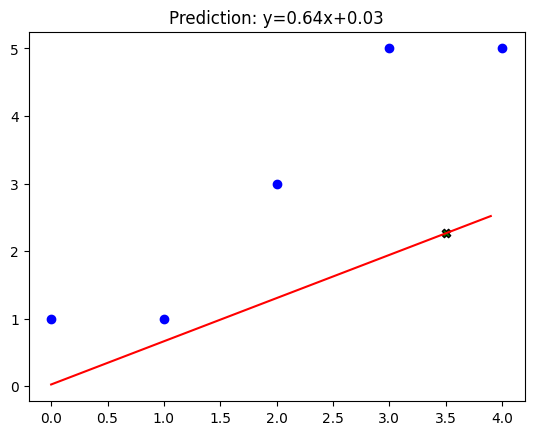

x = 3.5, y_pred: 2.26


In [6]:
# initial guess
x = 3.5
y_pred = linear_regression.predict(x)
print(f"x = {x}, y_pred: {y_pred:.2f}")

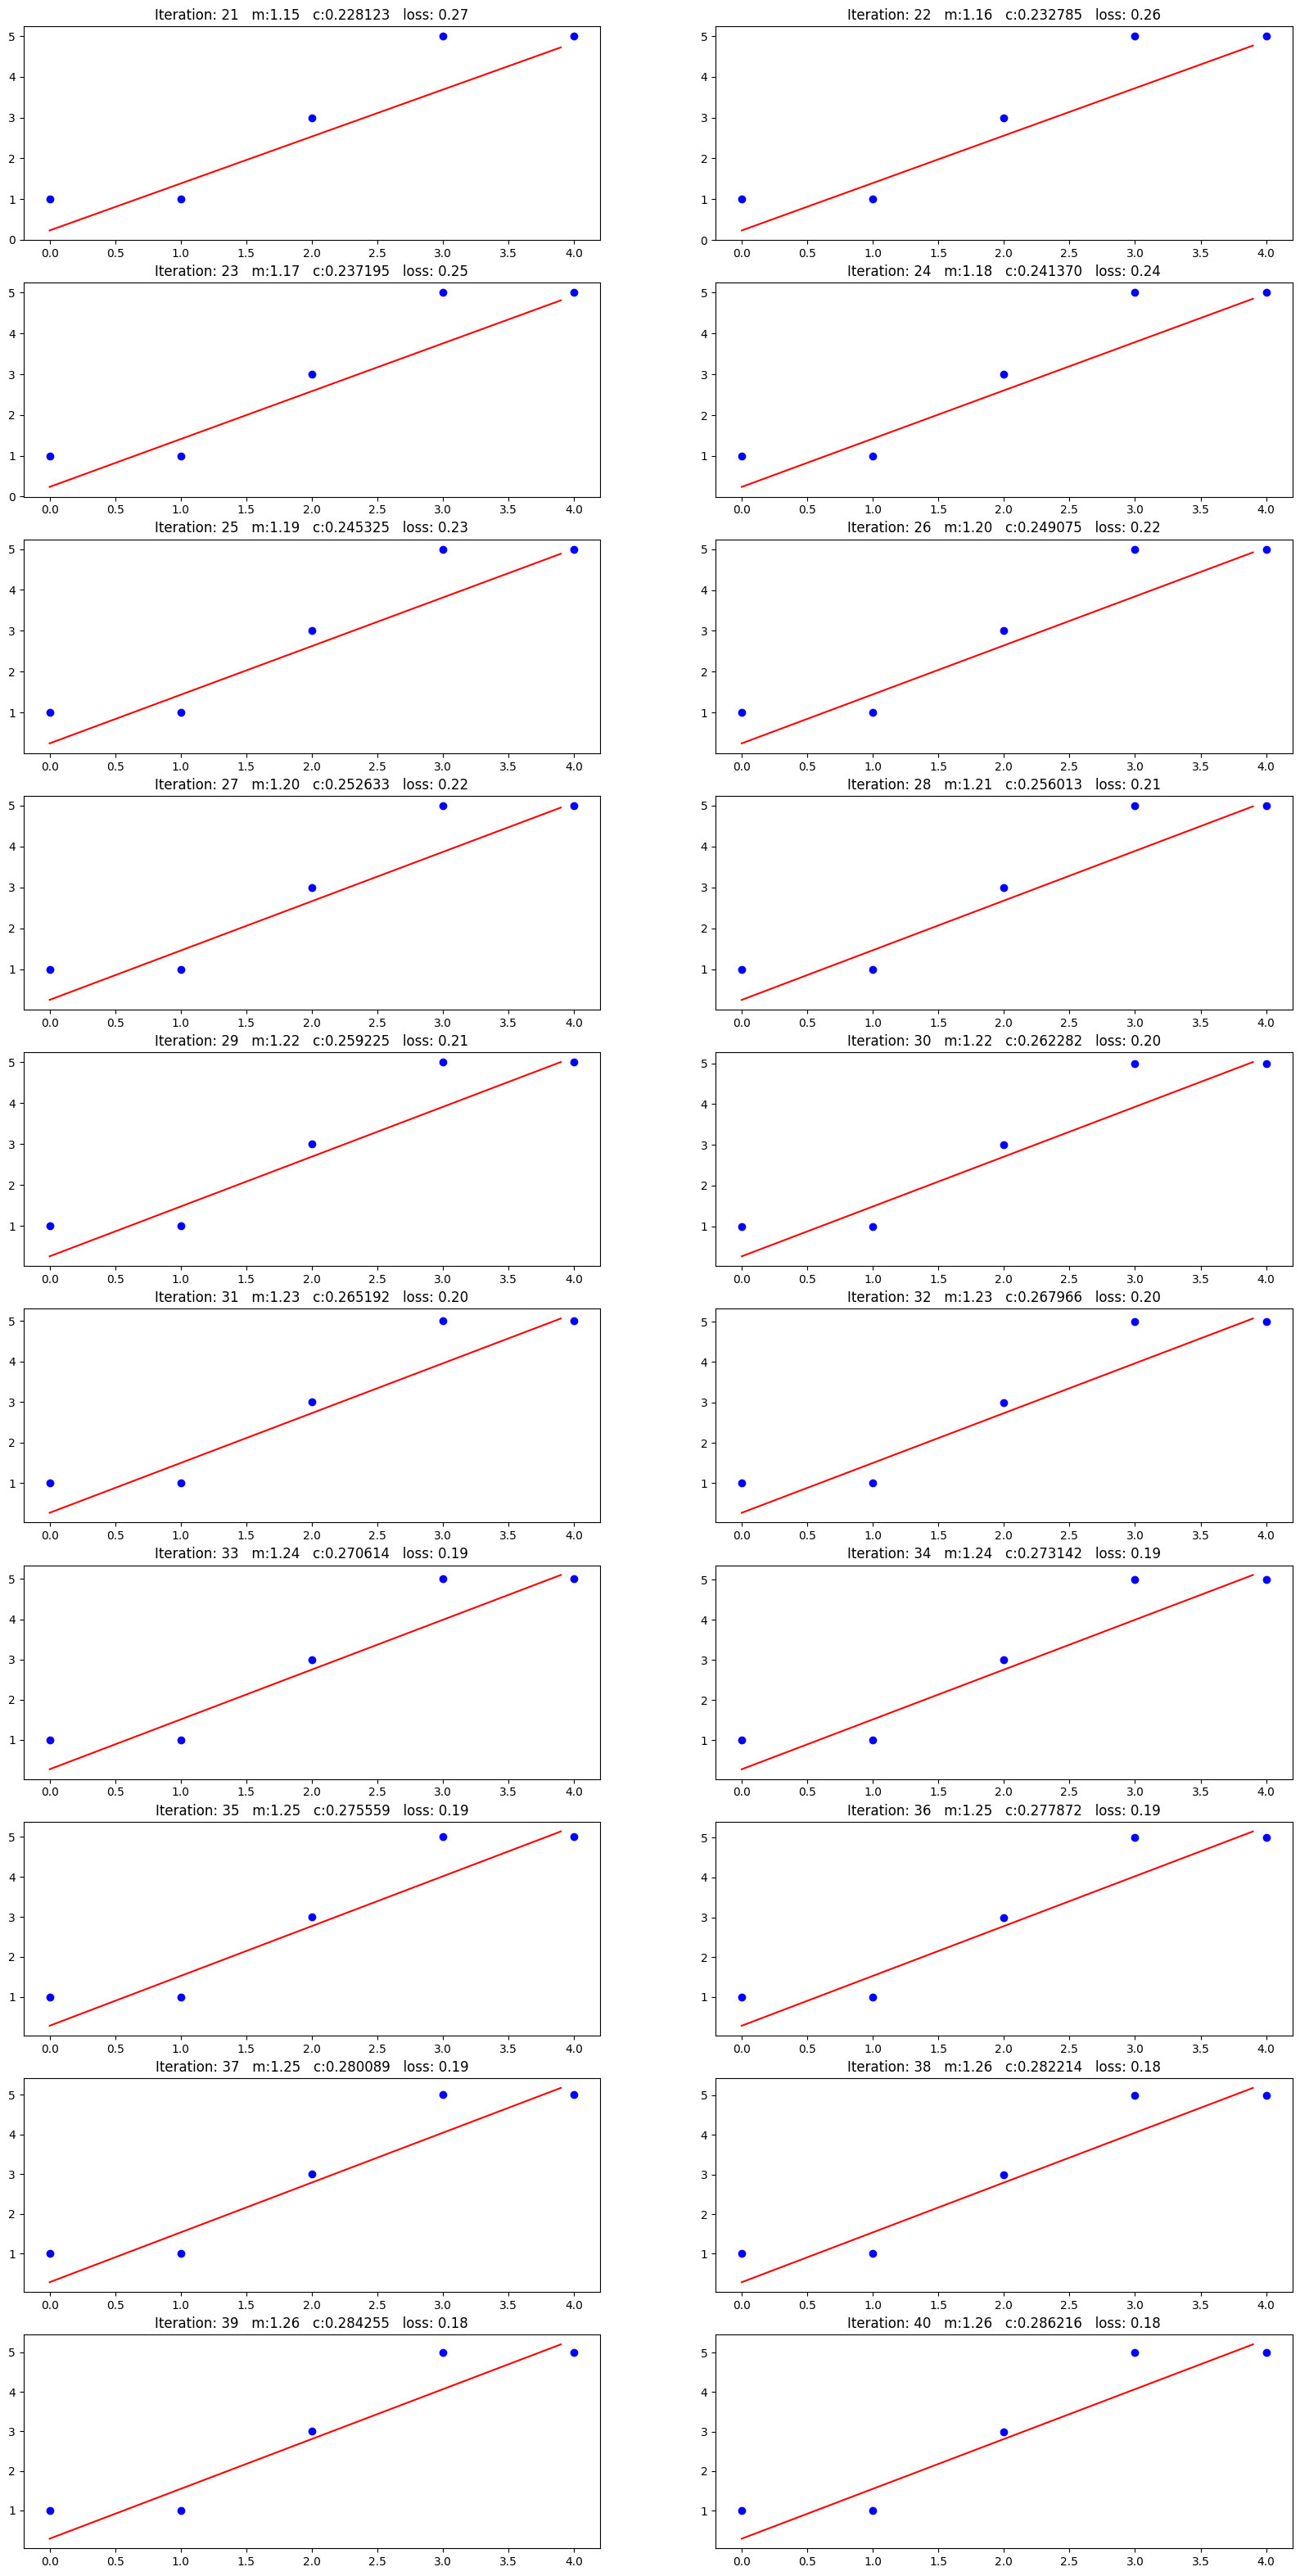

In [8]:
# linear_regression.verbose = True
linear_regression.fit(n_iter=20)

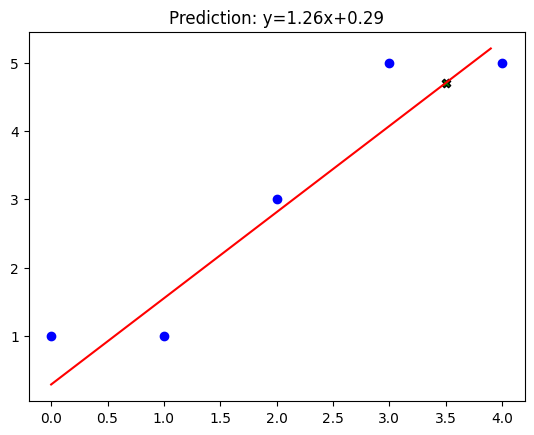

x = 3.5, y_pred: 4.71


In [9]:
x = 3.5
y_pred = linear_regression.predict(x)
print(f"x = {x}, y_pred: {y_pred:.2f}")

# K-Means Clustering

## Problem Formulation

In K-Means clustering, the goal is to find optimal position for a fixed number of centroids (center points) and cluster each point based on the centroid closest to the point. In this problem, we will assume that the number of centroids, $N$, is given. In practise, the number of centroids is usually determined by some domain knowledge of the problem or some other strategy that is beyond the scope of this workshop.

More formally, let us consider the case in 2-dimensions and define the set of given points as $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$. For convenience, we will also define $\textbf{x}_i = (x_i, y_i)$.

We shall also randomly initialise $N$ centroids, $(p_1, q_1), (p_2, q_2), \dots, (p_N, q_N)$. Similarly, we will define $\textbf{p}_i = (p_i, q_i)$.

Now, an intuitive way to measure how good our clustering mechanism is to calculate the distance between each point and its corresponding centroid, then take the sum of the distances.

More formally, we shall define the **Loss Function**, $L$, as the sum of all the distances. We thus have
$$L = \frac{1}{2n} \sum_{i=1}^n \min_{j} D(\textbf{x}_i, \textbf{p}_j)^2$$
where the $\displaystyle{\min_{j} D(\textbf{x}_i, \textbf{p}_j)}$ denotes the distance between the point $\textbf{x}_i$ and the centroid closest to it. The distance function, $D$, in 2-dimensions is just given by the equation
$$ D(\textbf{x}_i, \textbf{p}_j) = \sqrt{(x_i - p_j)^2 + (y_i - q_j)^2} $$

Notice that since $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$ are given, the only variables are are $(p_1, q_1), (p_2, q_2), \dots, (p_N, q_N)$. Siimlar to the linear regression problem, we just have to optimise these values to find the smallest possible value of $L(p_1, q_1, p_2, q_2, \dots, p_N, q_N)$.



## Gradient Descent Computation (Optional)

Using the language of partial derivatives, we have
$$ \nabla L(p_1, q_1, p_2, q_2, \dots, p_N, q_N) = \left( \frac{\partial L}{\partial p_1}, \frac{\partial L}{\partial q_1},  \frac{\partial L}{\partial p_2}, \frac{\partial L}{\partial q_2}, \dots, \frac{\partial L}{\partial p_N}, \frac{\partial L}{\partial q_N}\right)^T  $$

While this may look slightly intimidating, the computation of each partial derivative is simply
$$ \frac{\partial L}{\partial p_j} = \sum_{i=1}^n (p_j - x_i) \ \ \ and \ \ \ \frac{\partial L}{\partial q_j} = \sum_{i=1}^n (q_j - y_i)$$

However, as we intend to update the centroid positions and and cluster membership, we will thus update the coordinates of the centroid corresponding to each point at every step, instead of accumulating the gradient for every point.

The means, for each point $(x_i, y_i)$, we have the closest centroid $(p_j, q_j)$ to $(x_i, y_i)$. Then, we can update $(p_j, q_j)$ in the following manner:

$$
\begin{align*}
p_{j, new} &= p_{j, old} - \frac{1}{n_j}(p_{j, old} - x_i) \\
q_{j, new} &= q_{j, old} - \frac{1}{n_j}(q_{j, old} - y_i)
\end{align*}
$$

## Implementation (K-Means Clustering)

In practise, generally, you are not required to implement such algorithms from scratch. Pre-built libraries with optimised implementations are easily accessible (see later section). However, a basic implementation is given here to illustrate the step by step process of the clustering process.

In [12]:
class KMeansClusteringModule:

    def __init__(self,
                 data: list[tuple[float]],
                 n_centroids: int = 3,
                 max_norm: float = 5.0,
                 verbose: int = 0):
        """
        data: A list of tuples with a fixed number of dimensions
                E.g.: [(1, 2, 3), (1, 2, 1), (1, 2, 2), ...]
        n_centroids: The number of centroids (centres) that we want to have for
                        the clustering process (i.e. the number of distinct clusters)
        max_norm: The maximum magnitude of the gradient (prevent gradient explosion)
        verbose:
            0 - no plots shown
            1 - plots shown at each iteration
            2 - plots shown at each sub-iteration
        """
        self.data = data
        self.n = len(data)
        self.n_dim = len(data[0])
        self.n_centroids = n_centroids
        self.max_norm = max_norm
        self.verbose = verbose
        self.iter_cnt = 0
        self.centroids = []
        self.clusters = {}
        self.init_centroids()
        self.update_clusters()
        # Add more colours if required
        self.COLOUR_MAPPING = {
            0: (1, 0, 0), 1: (0, 1, 0), 2: (0, 0, 1),
            3: (1, 0, 1), 4: (1, 1, 0), 5: (0, 1, 1),
            6: (1, 0, 0.5), 7: (1, 0.5, 0), 8: (0, 0.5, 1),
        }
        # Maximum number of plots to show for each sub-iteration
        self.num_to_show = 10
        # Disable plots if dimensions != 2
        if len(self.data[0]) != 2:
            self.verbose = 0

    @staticmethod
    def sq_distance(p1: tuple[float], p2: tuple[float]):
        """
        Compute the squared distance (Euclidean distance) between two points
        """
        assert len(p1) == len(p2), \
            "Points should have the same number of dimensions!"
        n_dim = len(p1)
        sq_dist = 0
        for i in range(n_dim):
            sq_dist += (p1[i] - p2[i]) ** 2
        return sq_dist

    def init_centroids(self):
        """
        Randomly initialise the centroids
        """
        for i in range(self.n_centroids):
            self.centroids.append(tuple([random.random() for _ in range(self.n_dim)]))

    def update_clusters(self):
        """
        Update the membership of each point
        """
        self.clusters = {}
        for i in range(self.n_centroids):
            self.clusters[i] = []
        for curr_point in self.data:
            min_dist = 1e99
            closest_centroid_idx = 0
            for i in range(self.n_centroids):
                centroid = self.centroids[i]
                curr_dist = KMeansClusteringModule.sq_distance(curr_point, centroid)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    closest_centroid_idx = i
            self.clusters[closest_centroid_idx].append(curr_point)

    def plot(self, ax, sub_iter: int = None):
        """
        Plot the intermediate step of the K-Means Clustering process
        ax: An axis of a subplot
        sub_iter: The current sub-iteration of the process
                    If NONE, then do not plot sub-iteration
        """
        for i in range(self.n_centroids):
            centroid = self.centroids[i]
            points = self.clusters[i]
            data_x = [point[0] for point in points]
            data_y = [point[1] for point in points]
            ax.scatter(data_x, data_y, color=self.COLOUR_MAPPING[i])
            ax.scatter([centroid[0]], [centroid[1]],
                       color=self.COLOUR_MAPPING[i], marker='X', edgecolors='black')

        squared_err = self.loss()
        if sub_iter is not None:
            ax.set_title(f"Iteration: {self.iter_cnt}-{sub_iter}   loss: {squared_err:.2f}")
        else:
            ax.set_title(f"Iteration: {self.iter_cnt}   loss: {squared_err:.2f}")

    def get_loss(self):
        """
        Return the loss value
        """
        return self.loss()

    def loss(self):
        """
        Compute the loss, which is the squared error in this case
        """
        sq_err = 0
        for i in range(self.n_centroids):
            centroid = self.centroids[i]
            points = self.clusters[i]
            for curr_point in points:
                sq_err += KMeansClusteringModule.sq_distance(curr_point, centroid)
        sq_err /= (2 * self.n)
        return sq_err

    def step(self):
        """
        Update the coordinates of the centroids based on the gradient
        """
        cluster_sizes = [0] * self.n_centroids
        if self.verbose == 2:
            n = len(self.data)
            fig, ax = plt.subplots(self.num_to_show // 2, 2,
                                   figsize=(20, 5 // 2 * self.num_to_show))
            # show first five and last five steps
            idxs_to_show = set([0, 1, 2, 3, 4, n - 5, n - 4, n - 3, n - 2, n - 1])
            ax_idx = 0
        for idx, curr_point in enumerate(self.data):
            if self.verbose == 2 and idx in idxs_to_show:
                self.plot(ax[ax_idx // 2, ax_idx % 2], sub_iter=idx)
                ax_idx += 1
            min_dist = 1e99
            closest_centroid_idx = 0
            for i in range(self.n_centroids):
                centroid = self.centroids[i]
                curr_dist = KMeansClusteringModule.sq_distance(curr_point, centroid)
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    closest_centroid_idx = i
            cluster_sizes[closest_centroid_idx] += 1
            curr_centroid = self.centroids[closest_centroid_idx]
            new_centroid = []
            grad = []
            lr = 1 / cluster_sizes[closest_centroid_idx]
            # Computing the gradient
            for i in range(len(curr_centroid)):
                grad.append(curr_centroid[i] - curr_point[i])
            grad = np.array(grad)
            grad_norm = np.linalg.norm(grad)
            if grad_norm > self.max_norm:
                grad_norm *= self.max_norm / grad_norm
            new_centroid = np.array(curr_centroid) - lr * grad
            self.centroids[closest_centroid_idx] = tuple(new_centroid)
            self.update_clusters()


    def fit(self, n_iter: int = 10):
        """
        Train (fit) the clustering model
        """
        if self.verbose == 1:
            fig, ax = plt.subplots(n_iter // 2, 2,
                                   figsize=(20, 5 // 2 * n_iter))
        for i in range(n_iter):
            if self.verbose == 1:
                self.plot(ax[i // 2, i % 2])
            self.iter_cnt += 1
            self.step()
        if self.verbose:
            plt.show()

    def predict(self, point:tuple[float]):
        """
        Predicts the cluster that the point belongs to and plot the prediction
        if verbose is true.
        """
        min_dist = 1e99
        closest_centroid_idx = 0
        for i in range(self.n_centroids):
            centroid = self.centroids[i]
            curr_dist = KMeansClusteringModule.sq_distance(point, centroid)
            if curr_dist < min_dist:
                min_dist = curr_dist
                closest_centroid_idx = i
        if not self.verbose:
            return closest_centroid_idx, self.centroids[closest_centroid_idx]
        for i in range(self.n_centroids):
            centroid = self.centroids[i]
            points = self.clusters[i]
            data_x = [point[0] for point in points]
            data_y = [point[1] for point in points]
            plt.scatter(data_x, data_y, color=self.COLOUR_MAPPING[i])
            plt.scatter([centroid[0]], [centroid[1]],
                       color=self.COLOUR_MAPPING[i], marker='X', edgecolors='black')

        plt.title(f"Prediction")
        plt.scatter([point[0]], [point[1]], marker='*',
                    edgecolors='black',
                    color=self.COLOUR_MAPPING[closest_centroid_idx])
        return closest_centroid_idx, self.centroids[closest_centroid_idx]


## Example 1

Run the cells to view the step-by-step process of how gradient descent is applied in a K-means clustering context.

In [13]:
data = [(-1, 0), (1, 0), (0, 1), (0, -1),
        (9, 0), (11, 0), (10, 1), (10, -1),
        (4, 6), (6, 6), (5, 5), (5, 7)]
# data = [(-1, 0, 0), (1, 0, 0), (0, 1, 0), (0, -1, 0),
#         (9, 0, 0), (11, 0, 0), (10, 1, 0), (10, -1, 0),
#         (4, 6, 0), (6, 6, 0), (5, 5, 0), (5, 7, 0)]
k_means_clustering_1 = KMeansClusteringModule(data, n_centroids=3, verbose=2)

Point (0.5, 0.5) is closest to the centroid: (0.7364712141640124, 0.6766994874229113)


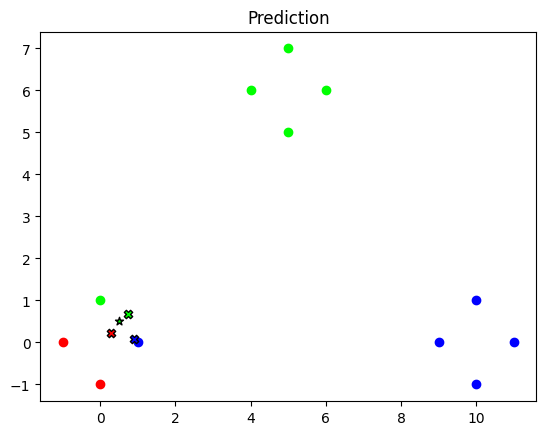

In [14]:
# initial guess
point = (0.5, 0.5)
cluster_id, centroid = k_means_clustering_1.predict(point)
print(f"Point {point} is closest to the centroid: {centroid}")

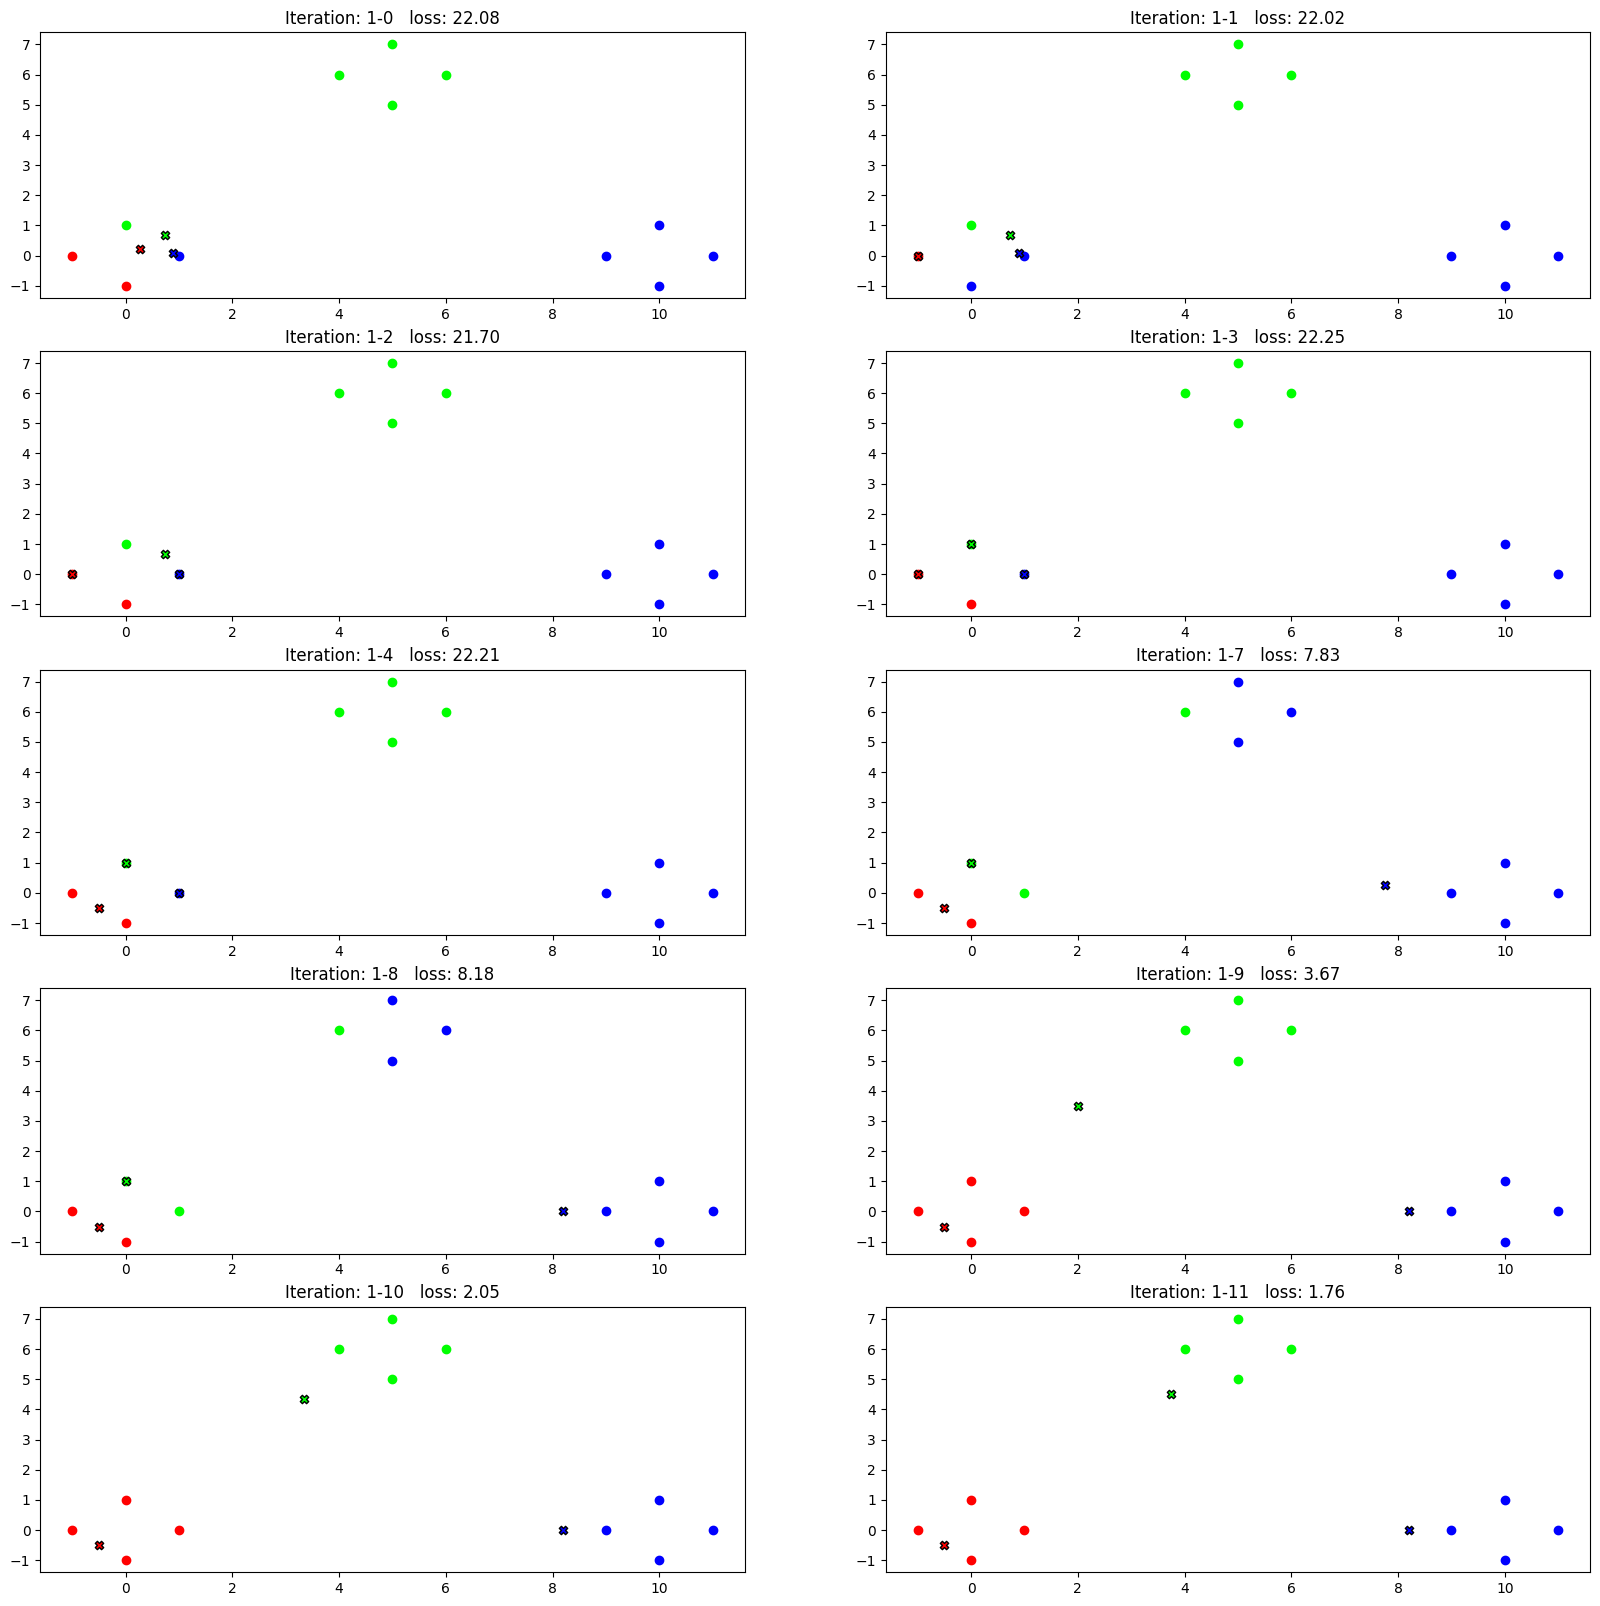

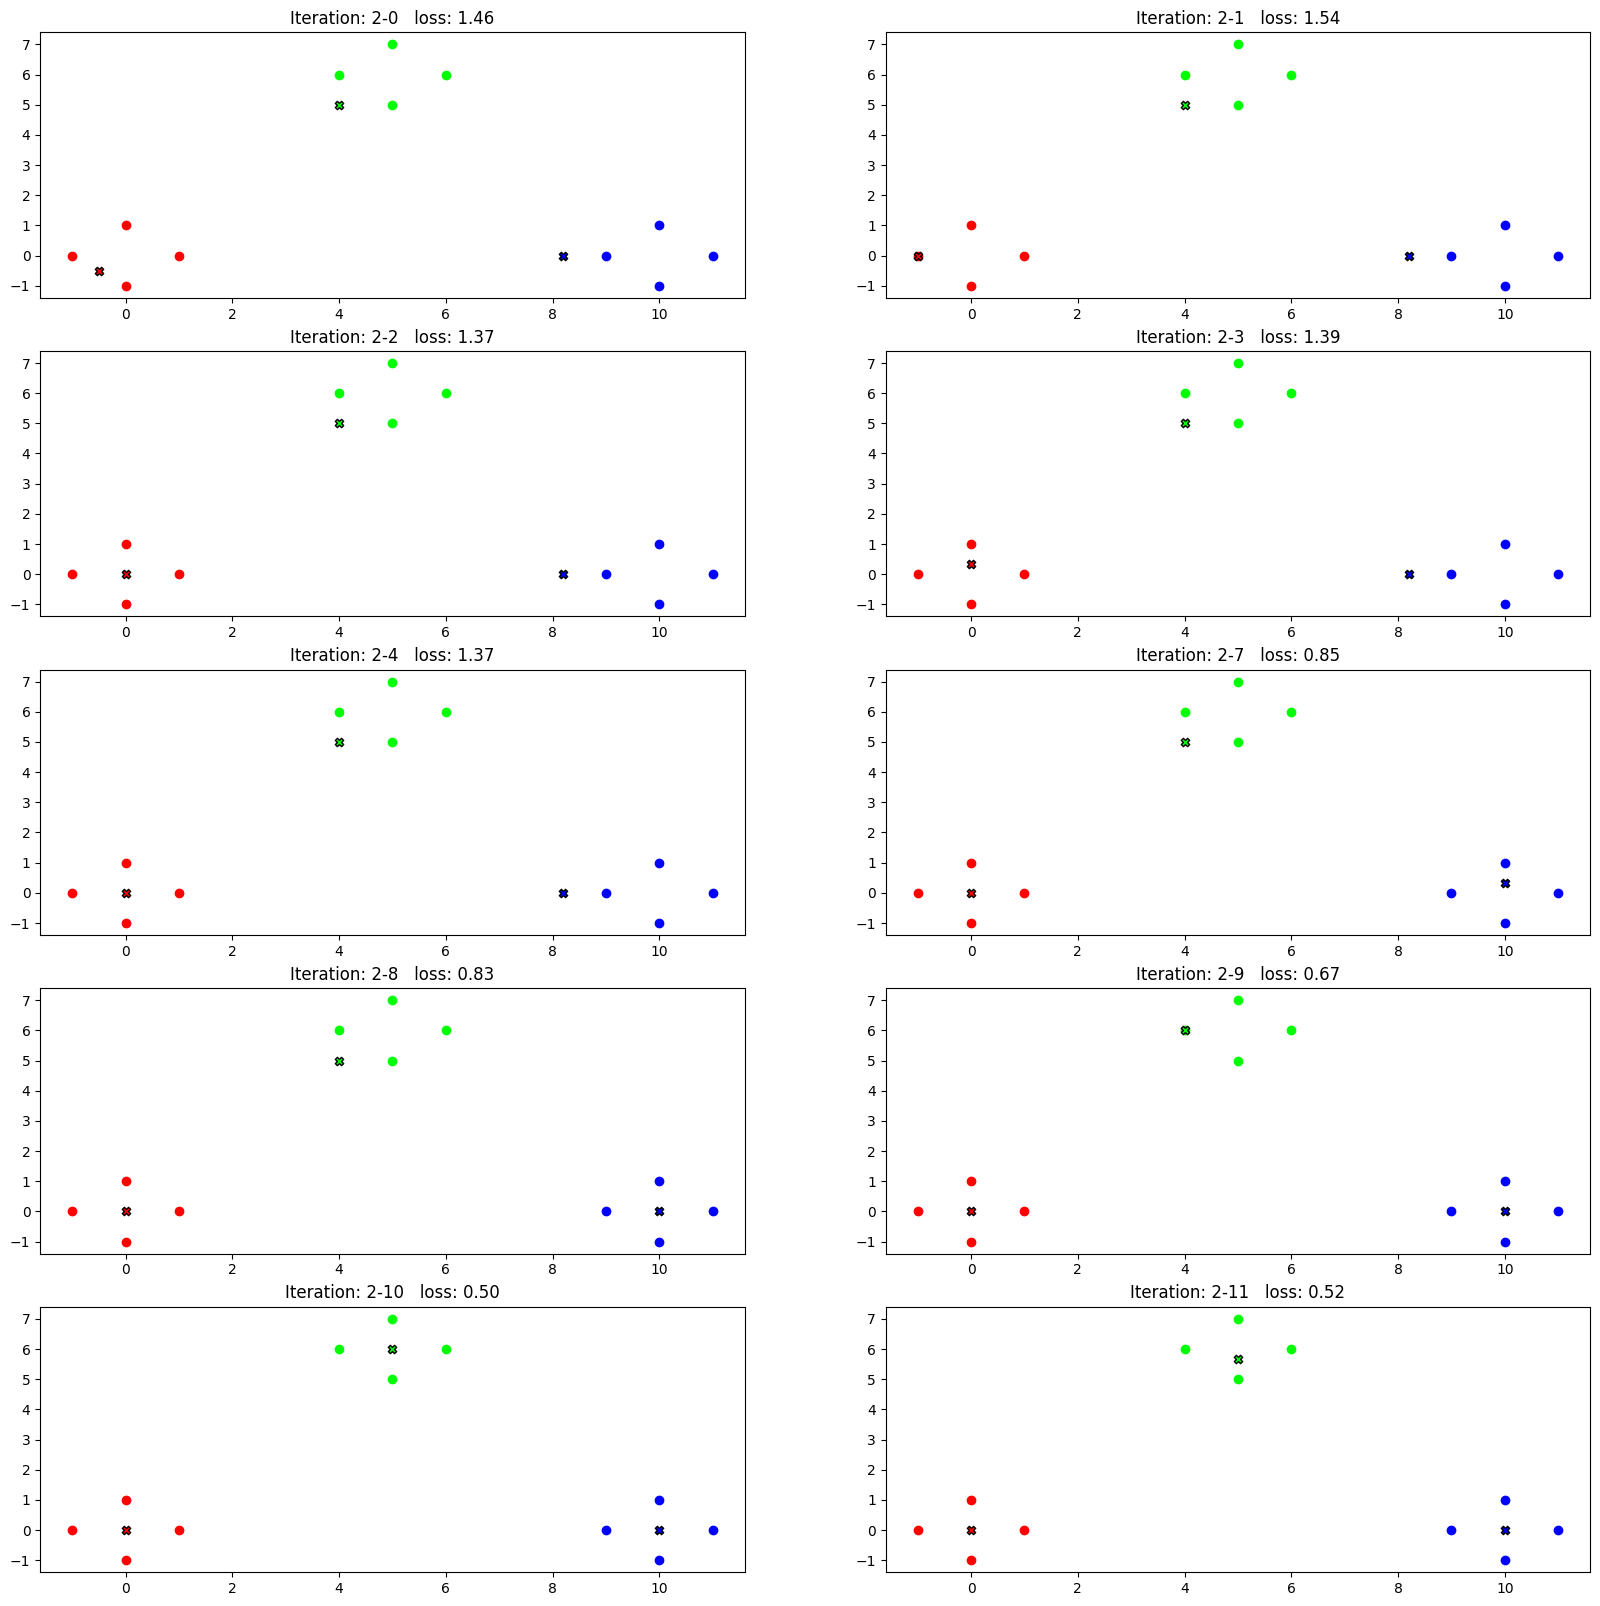

In [15]:
# k_means_clustering_1.verbose = 1
k_means_clustering_1.fit(n_iter=2)

Point (0.5, 0.5) is closest to the centroid: (0.0, 0.0)


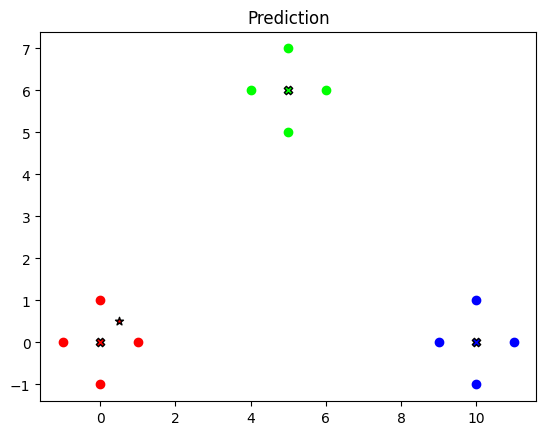

In [16]:
point = (0.5, 0.5)
cluster_id, centroid = k_means_clustering_1.predict(point)
print(f"Point {point} is closest to the centroid: {centroid}")

## Example 2

Here is a slightly more complicated example.

In [17]:
centers = [
    [0, 0],
    [10, 0],
    [5, 8.6],
    [12, 10]
]
n_centroids = len(centers)
X, y = make_blobs(n_samples=100, centers=centers, n_features=2, random_state=42)
X = X.tolist()

In [18]:
k_means_clustering_2 = KMeansClusteringModule(X, n_centroids=n_centroids, verbose=2)

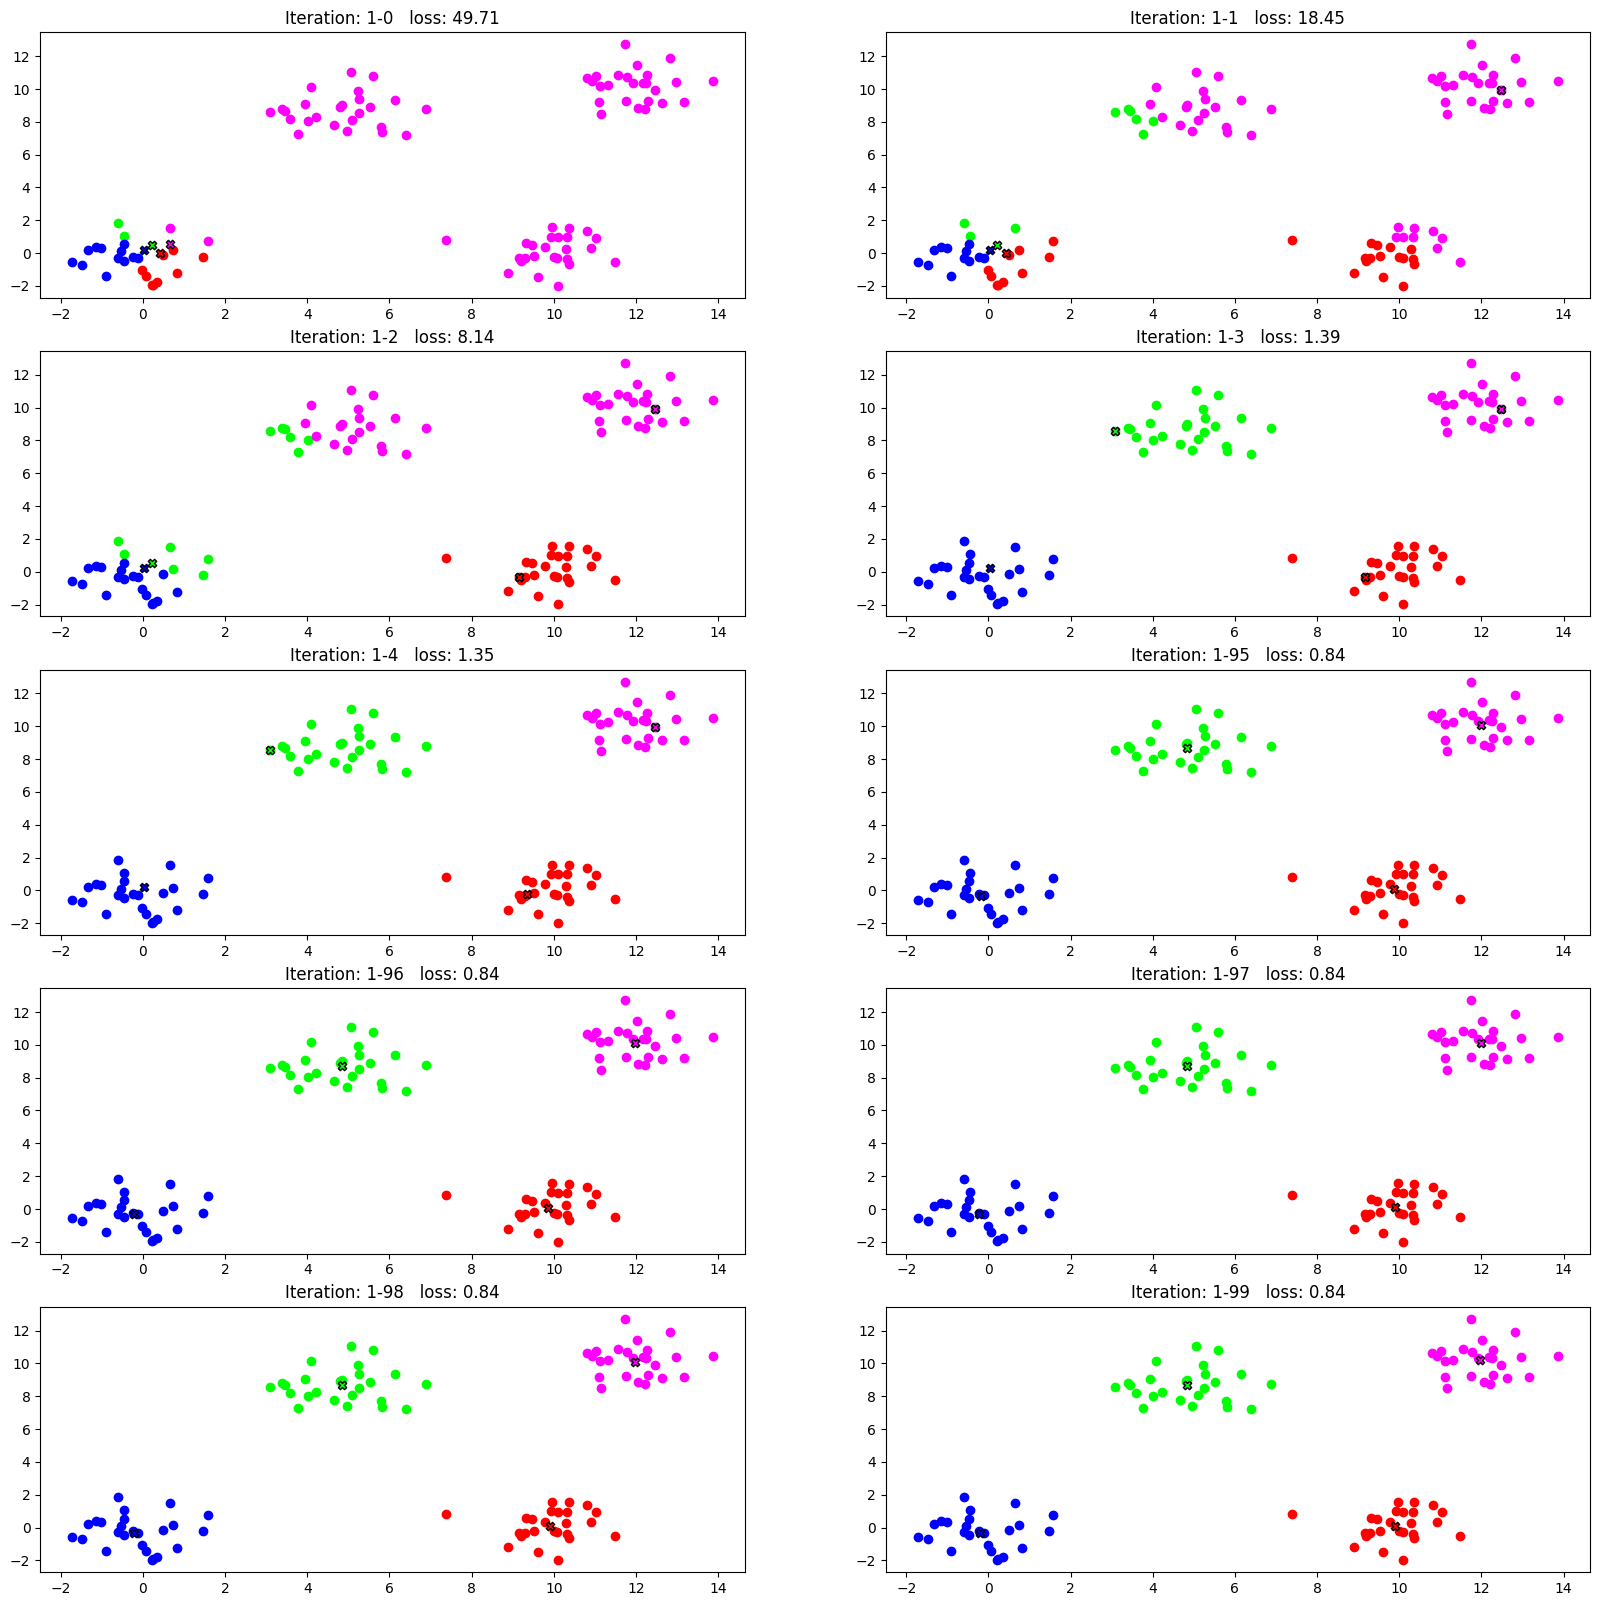

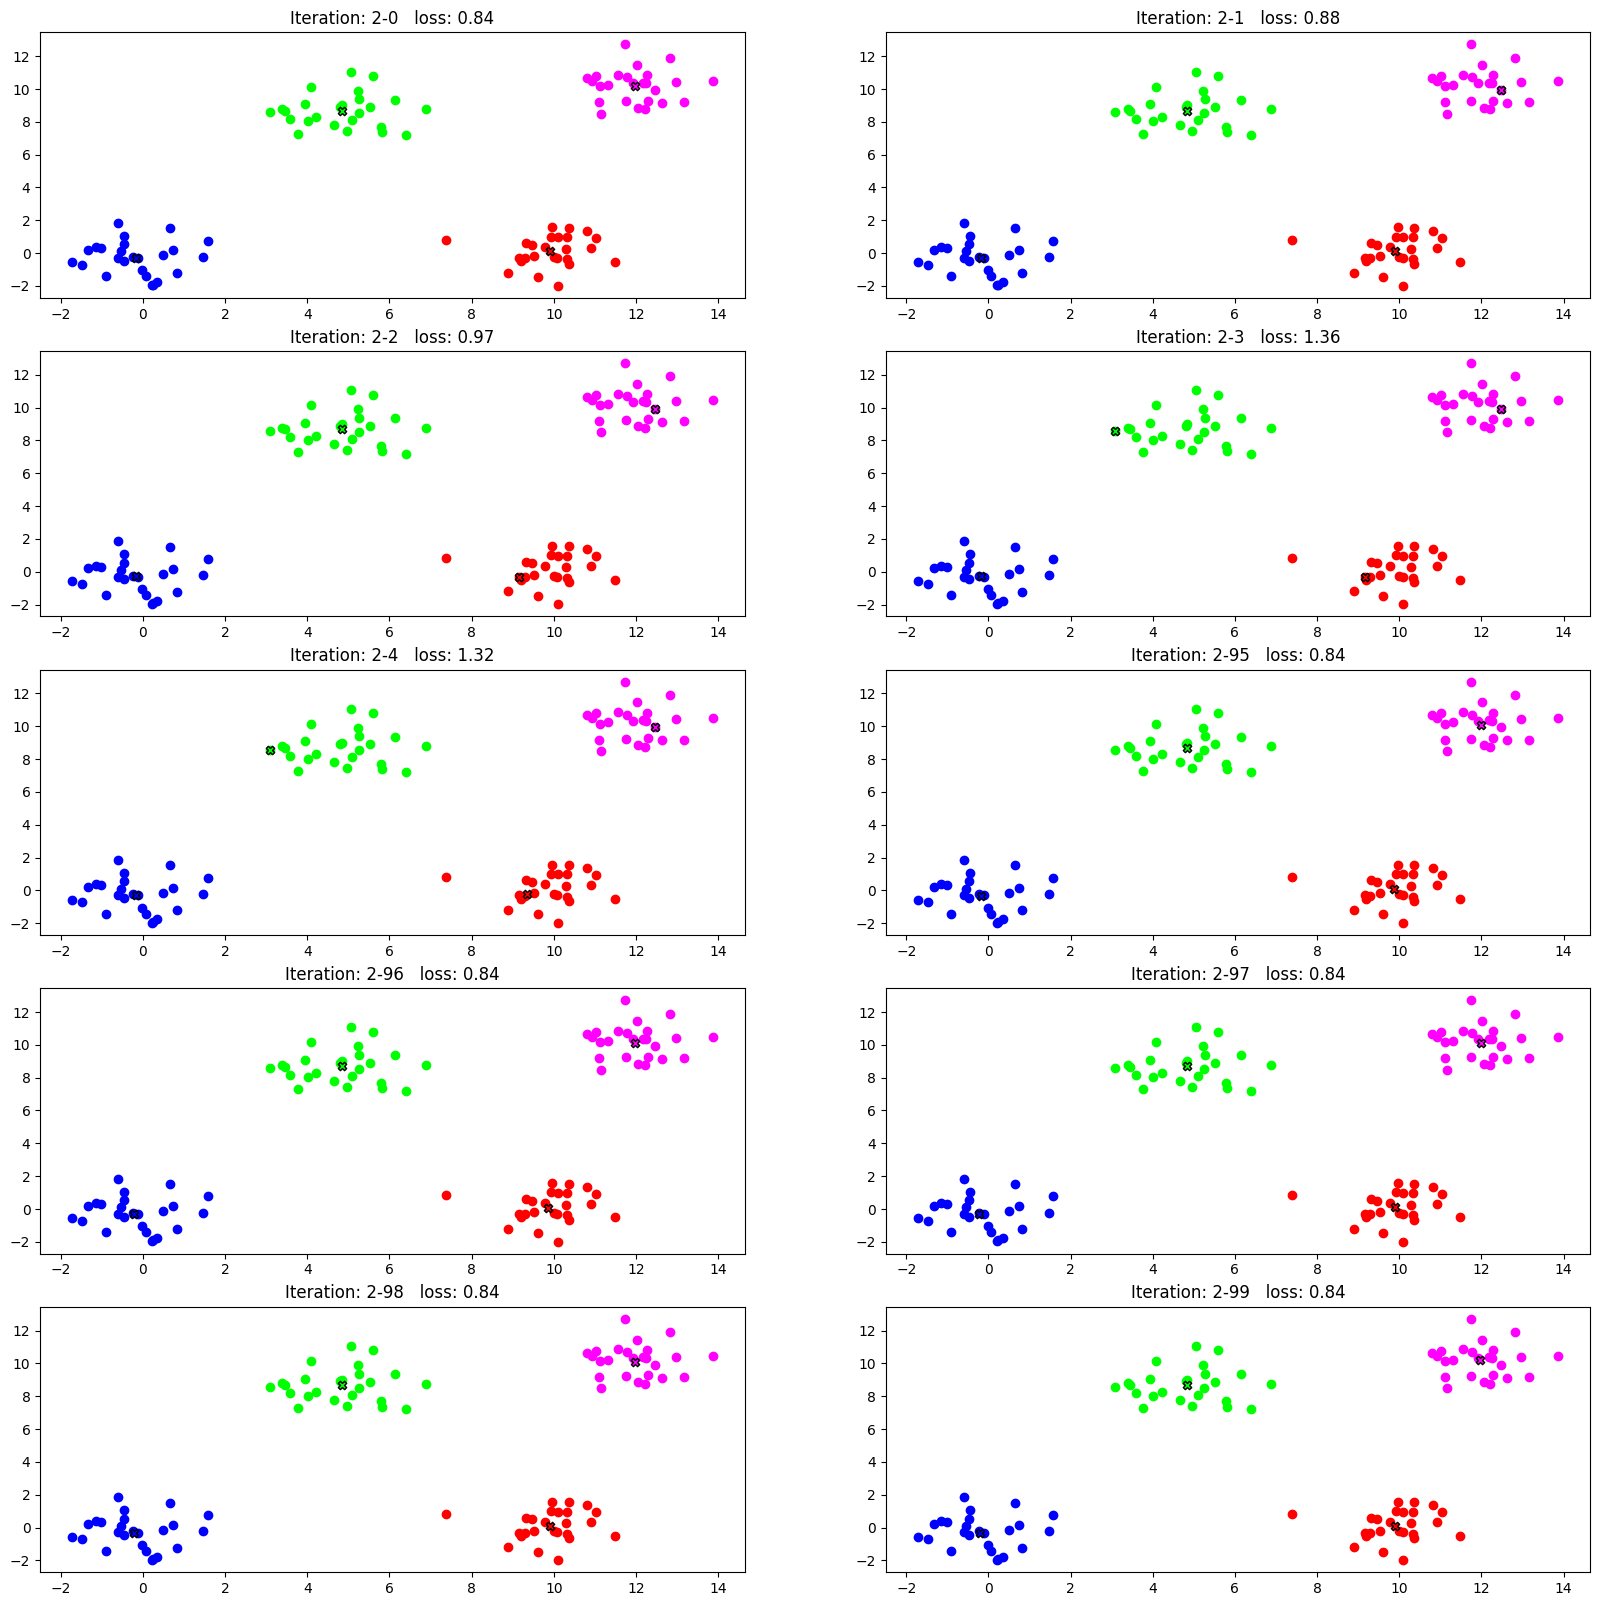

In [19]:
# k_means_clustering_2.verbose = 1
k_means_clustering_2.fit(n_iter=2)

Point (0.5, 0.5) is closest to the centroid: (-0.17979137099281117, -0.271156439519469)


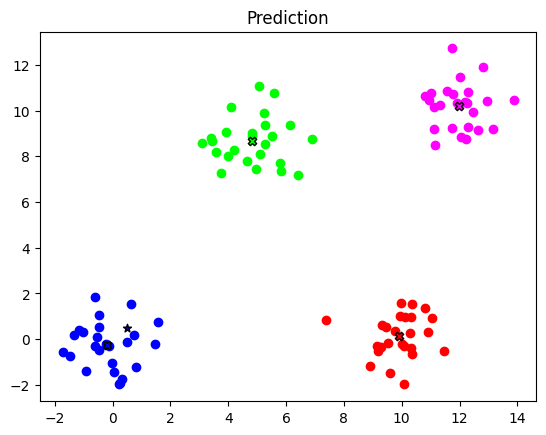

In [20]:
point = (0.5, 0.5)
cluster_id, centroid = k_means_clustering_2.predict(point)
print(f"Point {point} is closest to the centroid: {centroid}")

# Examples of Overfitting and Underfitting

## Overfitting Example

One instance of overfitting is when you define too many clusters in a clustering problem. \\
This will lead to the formation of clusters that do not capture the true underlying pattern in the data.

In [ ]:
data = [(-1, 0), (1, 0), (0, 1), (0, -1),
        (9, 0), (11, 0), (10, 1), (10, -1),
        (4, 6), (6, 6), (5, 5), (5, 7)]

k_means_clustering_1 = KMeansClusteringModule(data, n_centroids=5, verbose=2)

In [ ]:
k_means_clustering_1.fit(n_iter=2)

In [ ]:
point = (0.5, 0.5)
cluster_id, centroid = k_means_clustering_1.predict(point)
print(f"Point {point} is closest to the centroid: {centroid}")

# Underfitting Example

Similarly, an instance of underfitting is when you define too few clusters in a clustering problem. \\
This will lead to the formation of clusters that do not capture the true underlying pattern in the data.

In [ ]:
data = [(-1, 0), (1, 0), (0, 1), (0, -1),
        (9, 0), (11, 0), (10, 1), (10, -1),
        (4, 6), (6, 6), (5, 5), (5, 7)]

k_means_clustering_1 = KMeansClusteringModule(data, n_centroids=2, verbose=2)

In [ ]:
k_means_clustering_1.fit(n_iter=2)

In [ ]:
point = (0.5, 0.5)
cluster_id, centroid = k_means_clustering_1.predict(point)
print(f"Point {point} is closest to the centroid: {centroid}")

# References

Large Scale K-Means Clustering with Gradient Descent: \\
https://towardsdatascience.com/large-scale-k-means-clustering-with-gradient-descent-c4d6236acd7a